In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF, ECDFDiscrete

In [55]:
df = pd.read_csv('education_districtwise.csv')
print("First 10 row of the dataset: ")
df.head(10)

First 10 row of the dataset: 


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00
5,DISTRICT323,STATE1,12,523,96,1070144.0,64.32
6,DISTRICT114,STATE1,6,110,49,147104.0,80.48
7,DISTRICT438,STATE1,7,134,54,143388.0,74.49
8,DISTRICT610,STATE1,10,388,80,409576.0,65.97
9,DISTRICT476,STATE1,11,361,86,555357.0,69.90


In [56]:
df.describe()

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,680.000000,680.000000,680.000000,6.340000e+02,634.000000
mean,10.760294,874.614706,121.226471,1.899024e+06,73.395189
std,9.585360,622.711657,94.040172,1.547475e+06,10.098460
min,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,5.000000,390.750000,56.750000,8.226940e+05,66.437500
50%,8.000000,785.500000,101.000000,1.564392e+06,73.490000
75%,13.000000,1204.250000,162.500000,2.587520e+06,80.815000
max,66.000000,3963.000000,592.000000,1.105413e+07,98.760000


frequency analysis for 'overall literacy' (overall_li):
            count  cumulative count
OVERALL_LI                         
37.22           1                 1
42.67           1                 2
44.45           1                 3
48.20           1                 4
49.13           1                 5
...           ...               ...
96.40           1               630
96.93           1               631
98.35           1               632
98.50           1               633
98.76           1               634

[574 rows x 2 columns]

plotting ecdf for 'total population' column


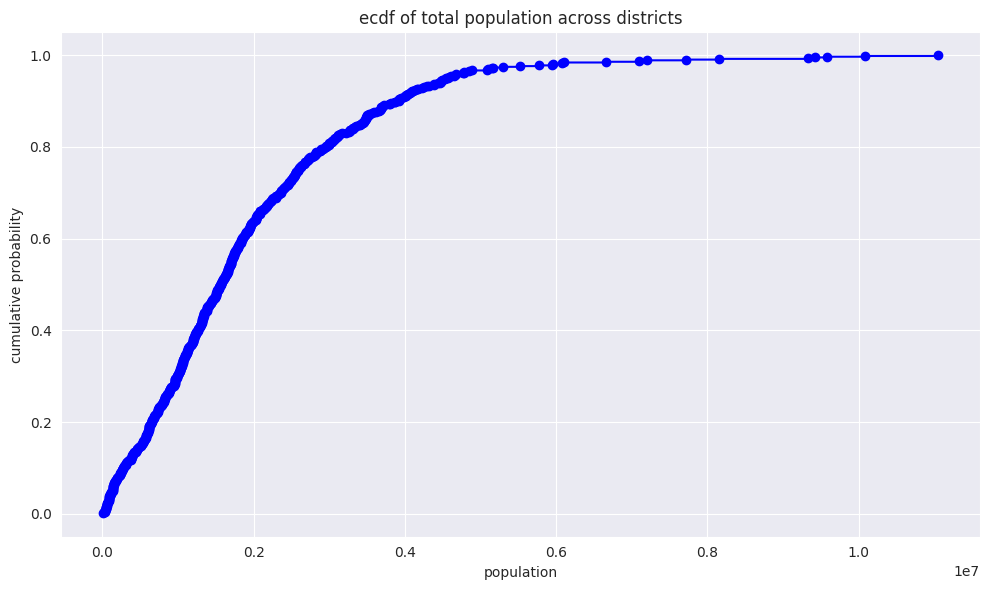

In [59]:
# read the csv file
district_data = pd.read_csv('education_districtwise.csv')

# get count and cumulative count of overall literacy
print("frequency analysis for 'overall literacy' (overall_li):")
literacy_counts = district_data['OVERALL_LI'].value_counts().sort_index()
freq_summary = pd.DataFrame({
    'count': literacy_counts,
    'cumulative count': literacy_counts.cumsum()
})
print(freq_summary)

# show ecdf for total population
print("\nplotting ecdf for 'total population' column")
population_values = district_data['TOTPOPULAT'].dropna()
population_ecdf = ECDF(population_values)

# draw the ecdf plot
plt.figure(figsize=(10, 6))
plt.step(population_ecdf.x, population_ecdf.y, where='post', color='blue', marker='o')
plt.title('ecdf of total population across districts')
plt.xlabel('population')
plt.ylabel('cumulative probability')
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# show frequency analysis for 'statname' (state name) column
print("frequency analysis for 'statname' (state name) column:")

# get count of each state
state_counts = df['STATNAME'].value_counts().sort_index()
print("\nabsolute frequency:")
print(state_counts)

# get cumulative count
state_cumulative = state_counts.cumsum()
print("\ncumulative frequency:")
print(state_cumulative)


frequency analysis for 'statname' (state name) column:

absolute frequency:
STATNAME
STATE1     22
STATE10     2
STATE11     3
STATE12     8
STATE13    33
STATE14     8
STATE15    13
STATE16    12
STATE17    36
STATE18     4
STATE19     1
STATE2      9
STATE20    34
STATE21    75
STATE22    51
STATE23    24
STATE24    30
STATE25    21
STATE26    22
STATE27    11
STATE28    38
STATE29    10
STATE3     20
STATE30     2
STATE31    27
STATE32     4
STATE33    27
STATE34    21
STATE35     9
STATE36     1
STATE4     11
STATE5     14
STATE6     30
STATE7     13
STATE8      1
STATE9     33
Name: count, dtype: int64

cumulative frequency:
STATNAME
STATE1      22
STATE10     24
STATE11     27
STATE12     35
STATE13     68
STATE14     76
STATE15     89
STATE16    101
STATE17    137
STATE18    141
STATE19    142
STATE2     151
STATE20    185
STATE21    260
STATE22    311
STATE23    335
STATE24    365
STATE25    386
STATE26    408
STATE27    419
STATE28    457
STATE29    467
STATE3     487
STATE30 

showing a bar chart of how many districts are there in each state


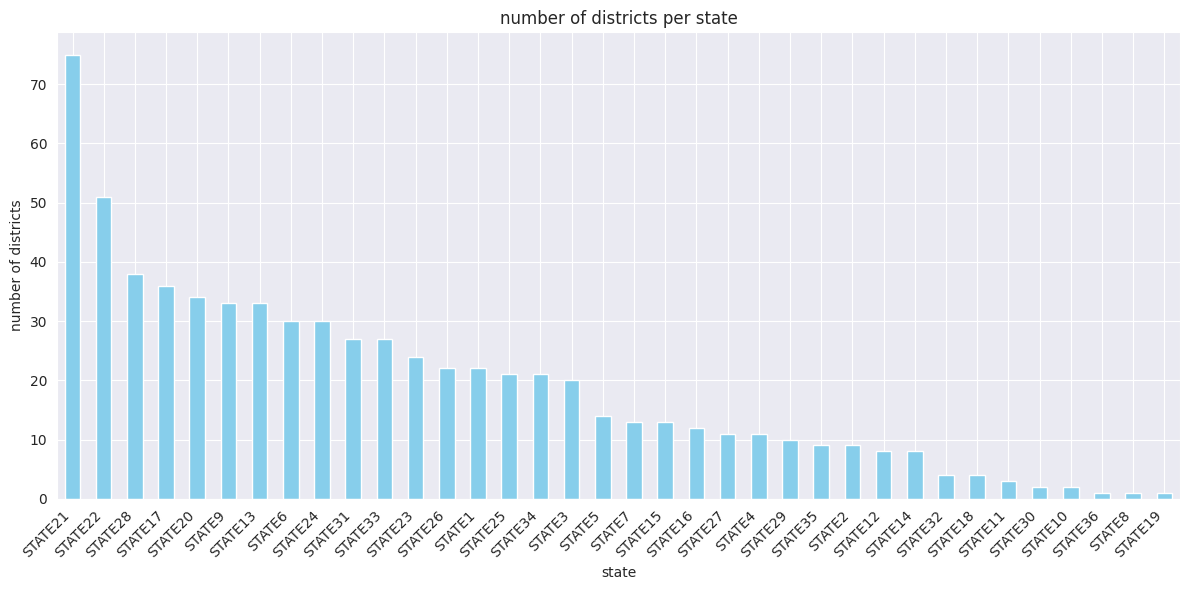

showing a histogram for overall literacy values


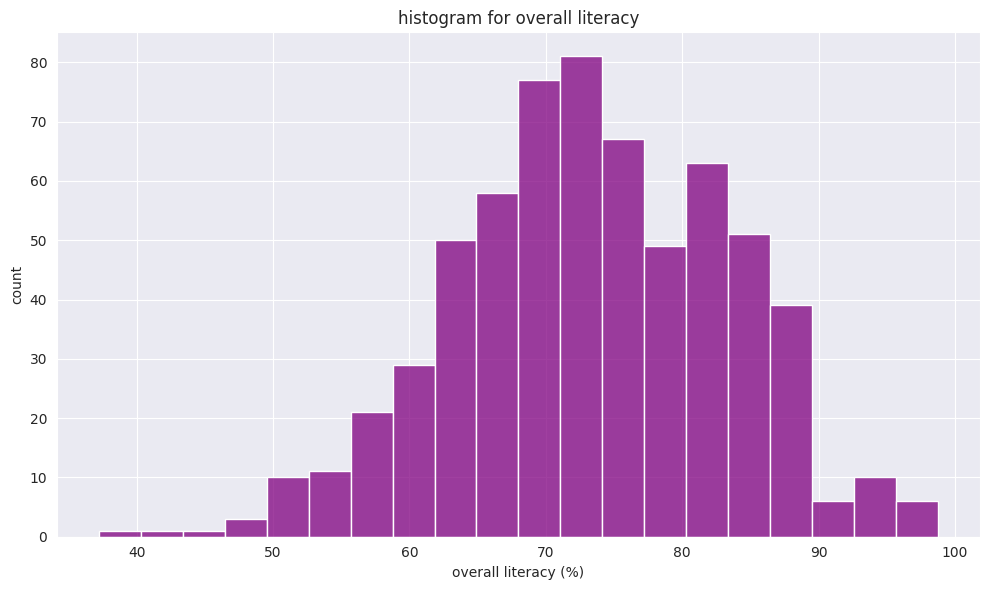

showing a kde plot (smooth curve) for overall literacy values


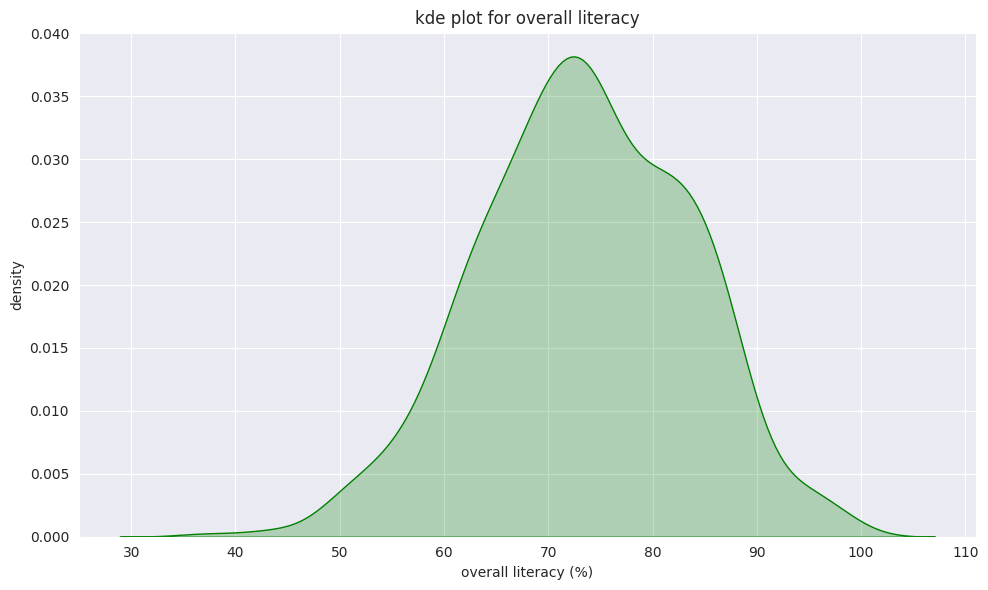

showing a pie chart of top 5 states by number of districts (others grouped)


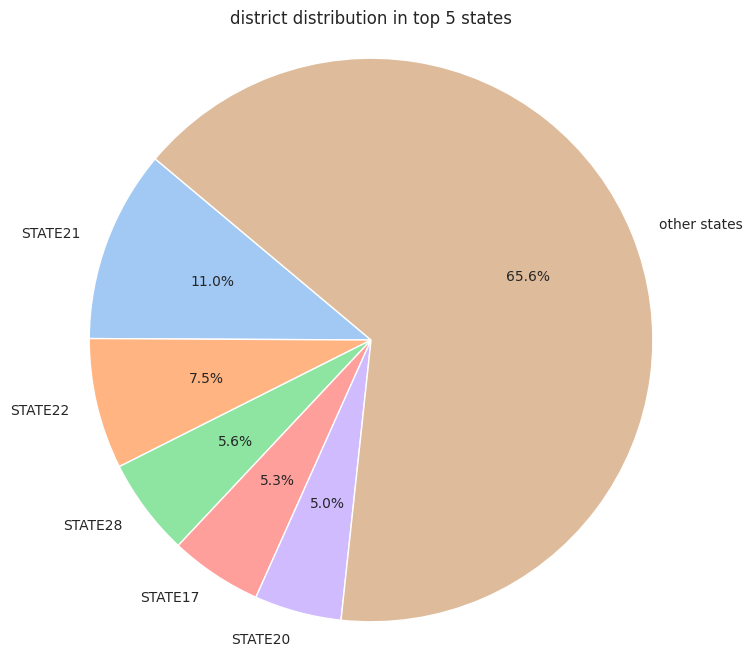

In [64]:
# bar chart showing number of districts in each state
print("showing a bar chart of how many districts are there in each state")
districts_per_state = df['STATNAME'].value_counts()
plt.figure(figsize=(12, 6))
districts_per_state.plot.bar(color='skyblue')
plt.title('number of districts per state')
plt.xlabel('state')
plt.ylabel('number of districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# histogram for overall literacy
print("showing a histogram for overall literacy values")
plt.figure(figsize=(10, 6))
sns.histplot(df['OVERALL_LI'], bins=20, color='purple')
plt.title('histogram for overall literacy')
plt.xlabel('overall literacy (%)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

# kde (density) plot for overall literacy
print("showing a kde plot (smooth curve) for overall literacy values")
plt.figure(figsize=(10, 6))
sns.kdeplot(df['OVERALL_LI'].dropna(), color='green', fill=True)
plt.title('kde plot for overall literacy')
plt.xlabel('overall literacy (%)')
plt.ylabel('density')
plt.tight_layout()
plt.show()

# pie chart for top 5 states by district count
print("showing a pie chart of top 5 states by number of districts (others grouped)")
top5_states = districts_per_state.head(5)
remaining = districts_per_state[5:].sum()
pie_chart_data = pd.concat([top5_states, pd.Series({'other states': remaining})])

plt.figure(figsize=(8, 8))
plt.pie(pie_chart_data, labels=pie_chart_data.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('district distribution in top 5 states')
plt.axis('equal')
plt.show()

In [63]:
# use a discrete numeric column
block_values = df['BLOCKS'].dropna()
total = len(block_values)
a = 5
b = 10

# get ecdf value for a number
def get_cdf(x, values):
    return (values <= x).sum() / len(values)

# get pmf value for a number
def get_pmf(x, values):
    return (values == x).sum() / len(values)

# compute needed values
cdf_a = get_cdf(a, block_values)
pmf_a = get_pmf(a, block_values)
cdf_b = get_cdf(b, block_values)
pmf_b = get_pmf(b, block_values)

print(f"using 'blocks' column with a = {a} and b = {b}")
print(f"f(a) = p(x = {a}) = {pmf_a}")
print(f"f(b) = p(x = {b}) = {pmf_b}")
print(f"F(a) = p(x <= {a}) = {cdf_a}")
print(f"F(b) = p(x <= {b}) = {cdf_b}")
print("-" * 30)

# h(a <= x <= b)
prob_inclusive = cdf_b - cdf_a + pmf_a
print(f"1. p({a} <= x <= {b}) = {prob_inclusive}")

# h(a < x <= b)
prob_right_inclusive = cdf_b - cdf_a
print(f"2. p({a} < x <= {b}) = {prob_right_inclusive}")

# h(a < x < b)
prob_strict_between = cdf_b - cdf_a - pmf_b
print(f"3. p({a} < x < {b}) = {prob_strict_between}")

# h(a <= x < b)
prob_left_inclusive = cdf_b - cdf_a + pmf_a - pmf_b
print(f"4. p({a} <= x < {b}) = {prob_left_inclusive}")


using 'blocks' column with a = 5 and b = 10
f(a) = p(x = 5) = 0.08676470588235294
f(b) = p(x = 10) = 0.061764705882352944
F(a) = p(x <= 5) = 0.25735294117647056
F(b) = p(x <= 10) = 0.6617647058823529
------------------------------
1. p(5 <= x <= 10) = 0.4911764705882353
2. p(5 < x <= 10) = 0.40441176470588236
3. p(5 < x < 10) = 0.3426470588235294
4. p(5 <= x < 10) = 0.4294117647058824


In [65]:
# choose the column to analyze
column = 'TOTPOPULAT'
values = df[column].dropna()  # remove missing values

# calculate central tendency and spread
avg = values.mean()
middle = values.median()
most_common = values.mode()
spread = values.std()
var = values.var()
val_range = values.max() - values.min()
q3 = values.quantile(0.75)

# show the results
print(f"measures for the column '{column}':")
print(f"mean: {avg}")
print(f"median: {middle}")
print(f"mode:\n{most_common}")
print(f"standard deviation: {spread}")
print(f"variance: {var}")
print(f"range: {val_range}")
print(f"75th percentile: {q3}")

measures for the column 'TOTPOPULAT':
mean: 1899024.1324921136
median: 1564392.5
mode:
0          7948.0
1         21089.0
2         31528.0
3         35289.0
4         36819.0
          ...    
629     9332481.0
630     9426959.0
631     9588910.0
632    10082852.0
633    11054131.0
Name: TOTPOPULAT, Length: 634, dtype: float64
standard deviation: 1547475.4472612448
variance: 2394680259876.3896
range: 11046183.0
75th percentile: 2587519.75


shape of the dataset (rows, columns):
(680, 7)

first 5 rows of the data:
      DISTNAME STATNAME  BLOCKS  VILLAGES  CLUSTERS  TOTPOPULAT  OVERALL_LI
0   DISTRICT32   STATE1      13       391       104    875564.0       66.92
1  DISTRICT649   STATE1      18       678       144   1015503.0       66.93
2  DISTRICT229   STATE1       8        94        65   1269751.0       71.21
3  DISTRICT259   STATE1      13       523       104    735753.0       57.98
4  DISTRICT486   STATE1       8       359        64    570060.0       65.00

dataframe info (column types and missing values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    680 non-null    object 
 1   STATNAME    680 non-null    object 
 2   BLOCKS      680 non-null    int64  
 3   VILLAGES    680 non-null    int64  
 4   CLUSTERS    680 non-null    int64  
 5   TOTPOPULAT  634 non-nul

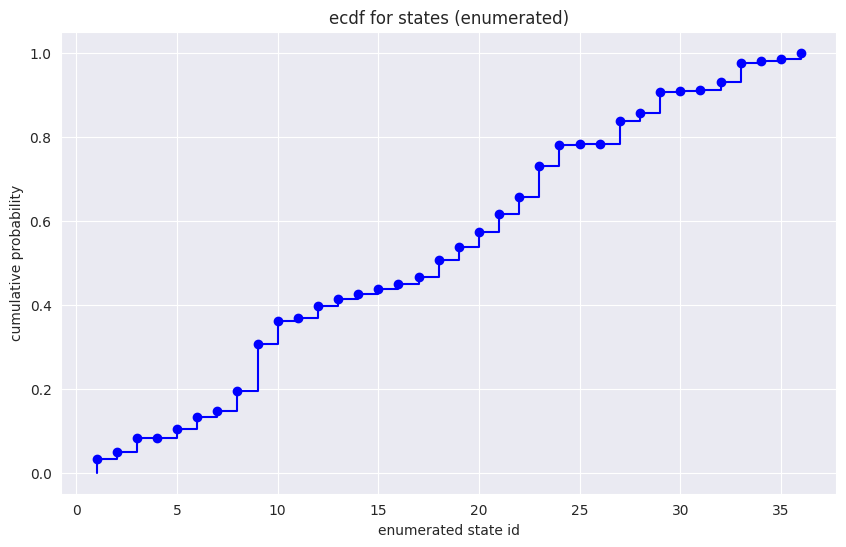

In [66]:
# basic overview of the dataset
print("shape of the dataset (rows, columns):")
print(df.shape)

print("\nfirst 5 rows of the data:")
print(df.head())

print("\ndataframe info (column types and missing values):")
print(df.info())

print("\ndescriptive stats for numeric columns:")
print(df.describe())

# frequency and relative frequency of states
print("\ndistrict count per state:")
print(df['STATNAME'].value_counts())

print("\nrelative frequency of districts per state:")
print(df['STATNAME'].value_counts() / df.shape[0])

# ecdf using discrete state labels
print("\ngenerating ecdf for states:")

# assign numbers to states
state_names = df['STATNAME'].unique()
state_ids = {name: idx + 1 for idx, name in enumerate(state_names)}
df['STATE_ENUMERATED'] = df['STATNAME'].map(state_ids)

# compute ecdf
ecdf = ECDFDiscrete(df['STATE_ENUMERATED'])

# plot ecdf
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y, 'bo-', drawstyle='steps-post')
plt.title('ecdf for states (enumerated)')
plt.xlabel('enumerated state id')
plt.ylabel('cumulative probability')
plt.grid(True)
plt.show()